In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r'C:\Users\A_R_COMPUTERS\Desktop\new DS\Book recommandation system\books.csv',encoding= 'unicode_escape')

In [3]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Unnamed: 12
0,34889,Brown's Star Atlas: Showing All The Bright Sta...,Brown,1.0,0,851742718,9.78E+12,eng,49,0,0,05-01-1977,Brown Son & Ferguson Ltd.
1,22128,Patriots (The Coming Collapse),James Wesley,1.0,3.63,156384155X,9.78E+12,eng,342,38,4,1/15/1999,Huntington House Publishers
2,16914,The Tolkien Fan's Medieval Reader,David E. Smith (Turgon of TheOneRing.net,1.0,3.58,1593600119,9.78E+12,eng,400,26,4,04-06-2004,Cold Spring Press
3,12224,Streetcar Suburbs: The Process of Growth in Bo...,Sam Bass Warner,1.0,3.58,674842111,9.78E+12,en-US,236,61,6,4/20/2004,Harvard University Press
4,2034,Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...,Aristophanes/F.W. Hall/W.M. Geldart,5.0,198145047,9.78E+12,grc,364,0,0,2/22/1922,Oxford University Press USA,NaN


In [4]:
df.average_rating.value_counts()

4.00    219
3.96    195
4.02    178
3.94    176
4.07    172
       ... 
3.06      1
4.76      1
3.10      1
4.65      1
4.91      1
Name: average_rating, Length: 209, dtype: int64

# EDA

In [5]:
pd.options.display.float_format='{:.2f}'.format

In [6]:
df.describe()

,bookID,average_rating,ratings_count,text_reviews_count
count,11127.00,11127.00,11127.00,11127.00
mean,21310.94,3.93,17936.49,541.86
std,13093.36,0.35,112479.43,2576.17
min,1.00,0.00,0.00,0.00
25%,10287.00,3.77,104.00,9.00
50%,20287.00,3.96,745.00,47.00
75%,32104.50,4.13,4993.50,237.50
max,45641.00,5.00,4597666.00,94265.00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11127 non-null  int64  
 1   title               11127 non-null  object 
 2   authors             11127 non-null  object 
 3   average_rating      11127 non-null  float64
 4   isbn                11127 non-null  object 
 5   isbn13              11127 non-null  object 
 6   language_code       11127 non-null  object 
 7   num_pages           11127 non-null  object 
 8   ratings_count       11127 non-null  int64  
 9   text_reviews_count  11127 non-null  int64  
 10  publication_date    11127 non-null  object 
 11  publisher           11127 non-null  object 
 12  Unnamed: 12         4 non-null      object 
dtypes: float64(1), int64(3), object(9)
memory usage: 1.1+ MB


# Top 10 books based on the avg. rating count


In [9]:
#df['average_rating']=df['average_rating'].astype('float')

<AxesSubplot:xlabel='average_rating', ylabel='title'>

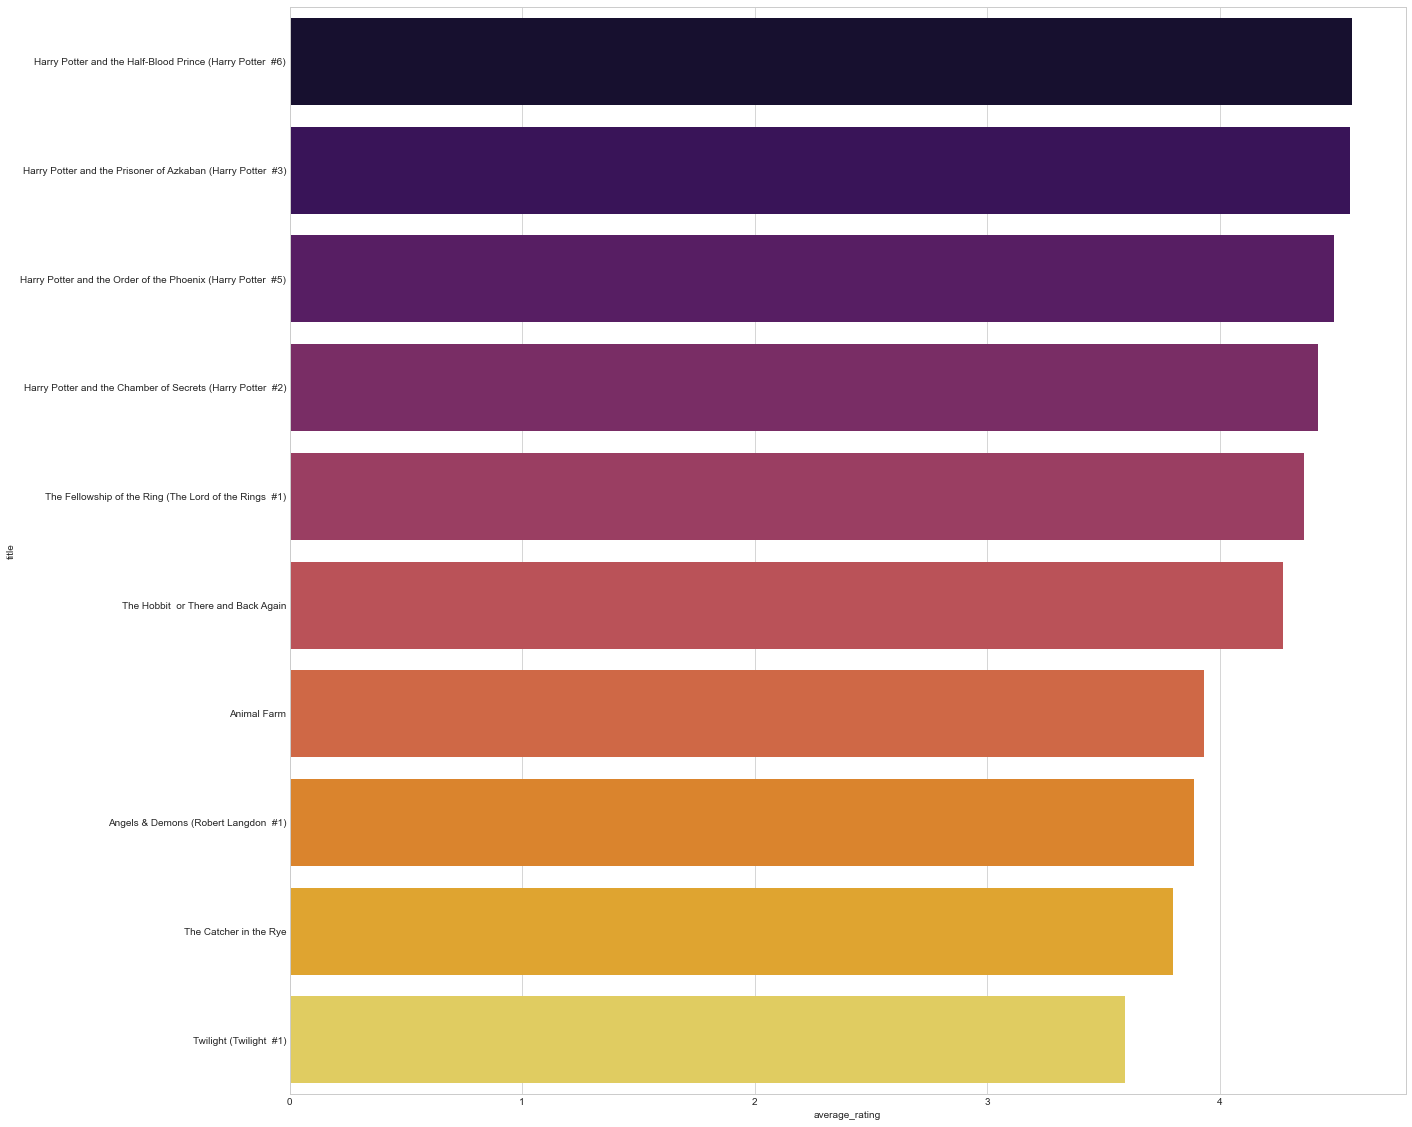

In [10]:
top_ten=df[df['ratings_count']>1000000]
top_ten=top_ten.sort_values(by='ratings_count',ascending=False).head(10)
top_ten_rating=top_ten.sort_values(by='average_rating',ascending=False)
top_ten_rating

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,20))

sns.barplot(x='average_rating', y='title',data=top_ten_rating,palette='inferno')

# Top 10 author based on the no. of books

In [11]:
auth=df.groupby('authors')['title'].count().reset_index().sort_values('title',ascending=False).head(10)
auth

,authors,title
4750,P.G. Wodehouse,40
5791,Stephen King,40
5473,Rumiko Takahashi,39
4714,Orson Scott Card,35
46,Agatha Christie,33
4990,Piers Anthony,30
4308,Mercedes Lackey,29
5532,Sandra Brown,29
1403,Dick Francis,28
4022,Margaret Weis/Tracy Hickman,23


C:\Users\A_R_COMPUTERS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


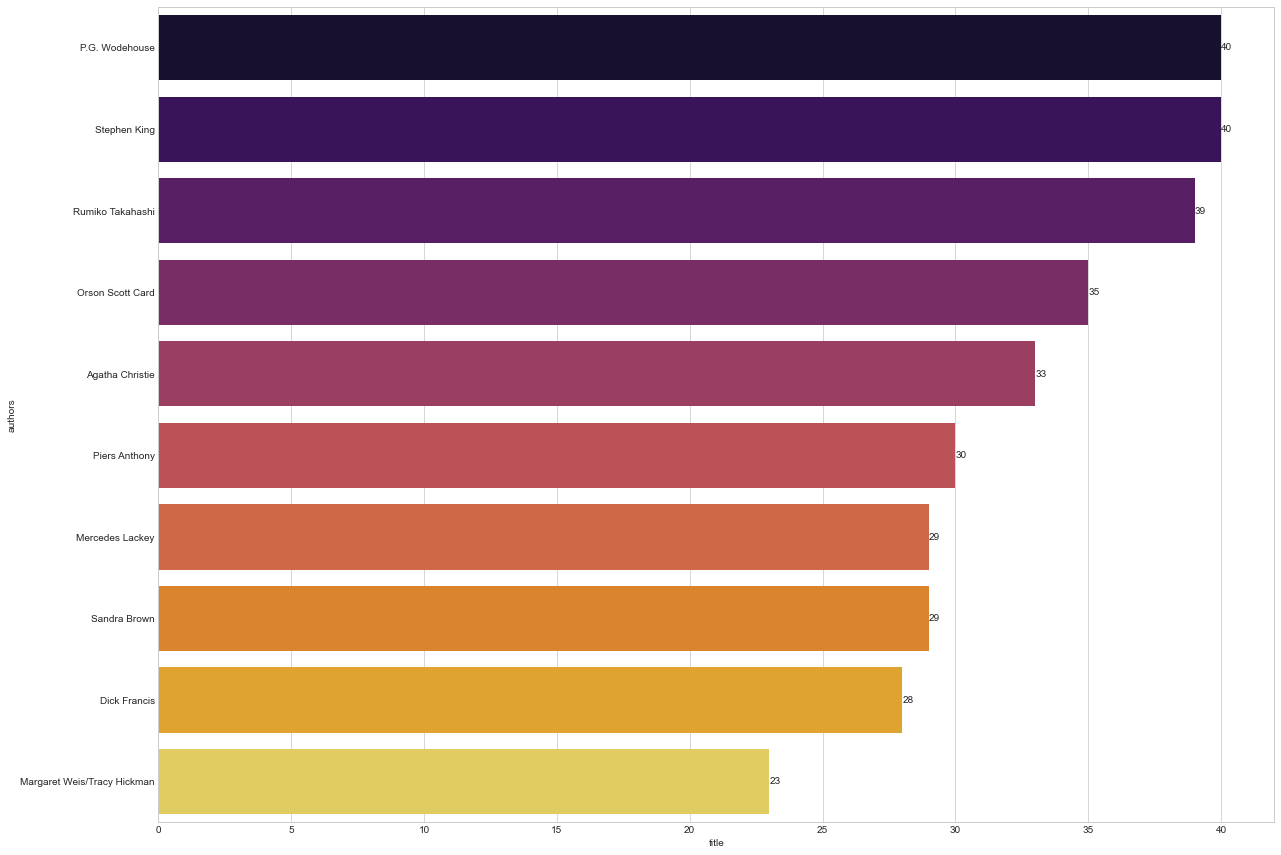

In [12]:
plt.figure(figsize=(20,15))

ax=sns.barplot(auth.title,auth.authors,palette="inferno")
ax.bar_label(ax.containers[0])
plt.show()

# Total number of written text reviews the book received

## which title got most no. of text review

In [13]:
df.text_reviews_count.describe()

count   11127.00
mean      541.86
std      2576.17
min         0.00
25%         9.00
50%        47.00
75%       237.50
max     94265.00
Name: text_reviews_count, dtype: float64

In [14]:
df.text_reviews_count.sort_values(ascending=False).head(20)

9953     94265
609      86881
2798     56604
7076     55843
3483     52759
1463     47951
10147    47620
1226     46176
7959     43499
123      36325
7366     35877
6781     35537
432      34692
1633     34690
5313     34301
1219     32871
5996     29677
3699     29652
234      29221
2956     27884
Name: text_reviews_count, dtype: int64

C:\Users\A_R_COMPUTERS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='text_reviews_count', ylabel='title'>

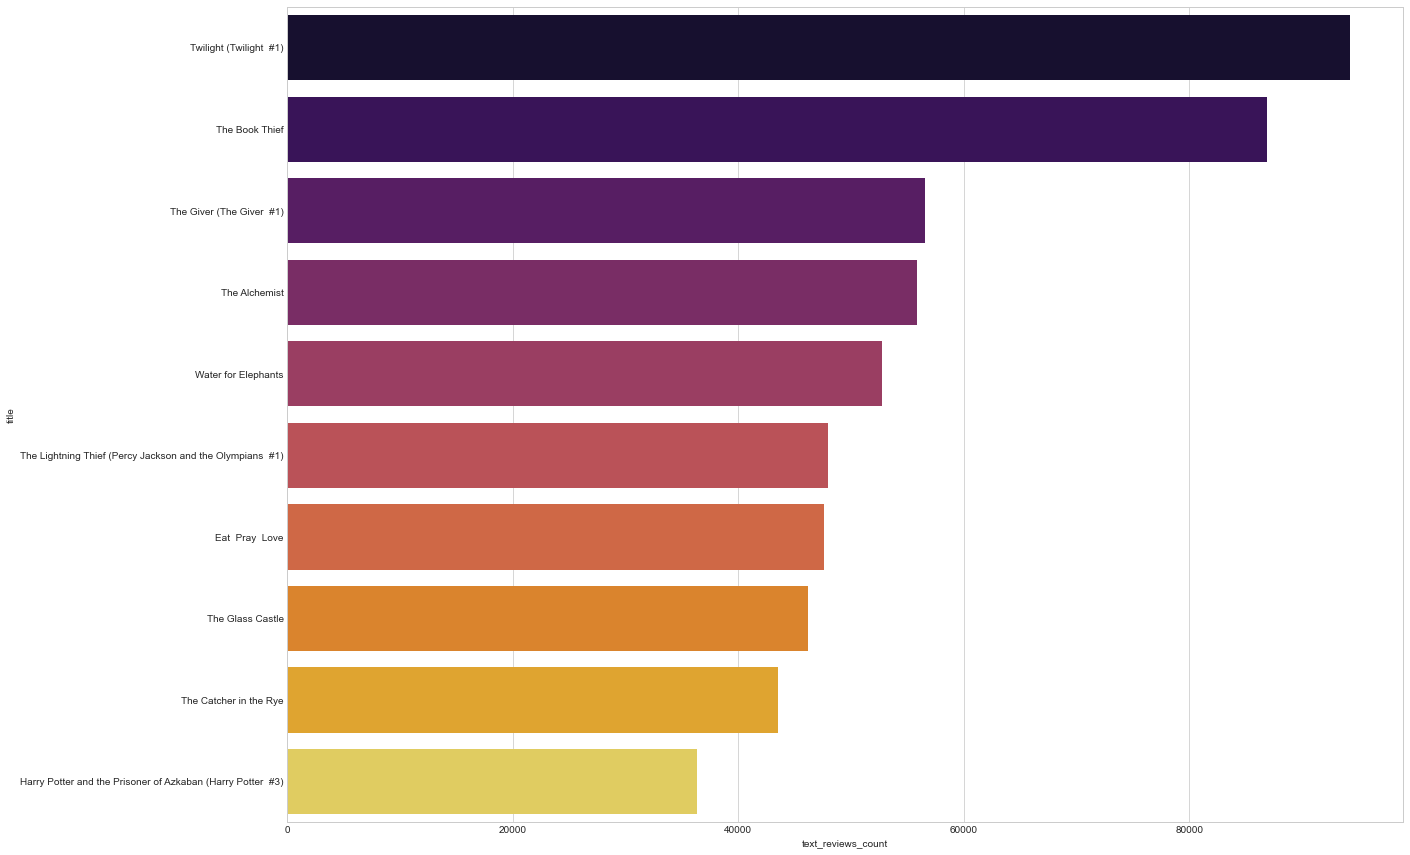

In [15]:
text=df[df['text_reviews_count']>35000]

text_review=text.sort_values('text_reviews_count',ascending=False).head(10)
plt.figure(figsize=(20,15))
sns.barplot(text_review.text_reviews_count,text_review.title,palette='inferno')
#reviews=df.groupby('title')['text_reviews_count'].count().reset_index().sort_values('text_reviews_count',ascending=False).head(30)
#reviews

# which title got most no.of rating

In [16]:
df.ratings_count.sort_values(ascending=False).head(20)

9953    4597666
1219    2530894
7959    2457092
6616    2418736
123     2339585
432     2293963
234     2153167
633     2128944
5996    2111750
110     2095690
9288    2036679
8719    1893917
1463    1766725
6933    1755253
7366    1679706
7076    1631221
2798    1585589
609     1516367
3653    1479727
2956    1409369
Name: ratings_count, dtype: int64

C:\Users\A_R_COMPUTERS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


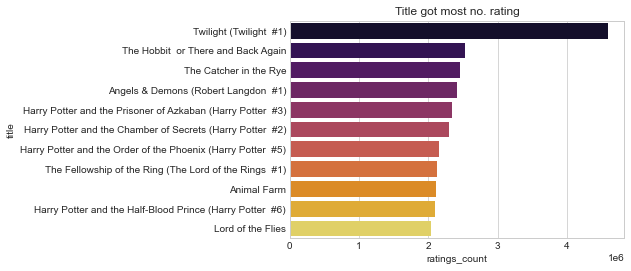

<Figure size 1440x1440 with 0 Axes>

In [17]:
most_rating=df[df['ratings_count']>2000000]
most_rating=most_rating.sort_values('ratings_count',ascending=False).head(20)
plt.title("Title got most no. rating")
sns.barplot(most_rating.ratings_count,most_rating.title,palette="inferno")
plt.figure(figsize=(20,20))

plt.show()

In [18]:
#relation between avg rating connt and tating count
# relation between no. page and rating count


In [19]:
df

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Unnamed: 12
0,34889,Brown's Star Atlas: Showing All The Bright Sta...,Brown,1.00,0,851742718,9.78E+12,eng,49,0,0,05-01-1977,Brown Son & Ferguson Ltd.
1,22128,Patriots (The Coming Collapse),James Wesley,1.00,3.63,156384155X,9.78E+12,eng,342,38,4,1/15/1999,Huntington House Publishers
2,16914,The Tolkien Fan's Medieval Reader,David E. Smith (Turgon of TheOneRing.net,1.00,3.58,1593600119,9.78E+12,eng,400,26,4,04-06-2004,Cold Spring Press
3,12224,Streetcar Suburbs: The Process of Growth in Bo...,Sam Bass Warner,1.00,3.58,674842111,9.78E+12,en-US,236,61,6,4/20/2004,Harvard University Press
4,2034,Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...,Aristophanes/F.W. Hall/W.M. Geldart,5.00,198145047,9.78E+12,grc,364,0,0,2/22/1922,Oxford University Press USA,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11122,37467,Classroom Interactions as Cross-Cultural Encou...,Jasmine C.M. Luk/Angel M.Y. Lin,0.00,805850848,9.78E+12,eng,241,0,0,08-05-2006,Routledge,NaN
11123,41044,Day and Night,Better Homes and Gardens,0.00,696018829,9.78E+12,eng,32,0,1,03-01-1989,Meredith Corporation,NaN
11124,42758,The Fantastic Vampire: Studies in the Children...,James Craig Holte,0.00,313309337,9.78E+12,eng,176,0,0,3/30/2002,Greenwood Press,NaN
11125,44705,The Leadership Challenge: Skills for Taking Ch...,Warren G. Bennis,0.00,088684049X,9.78E+12,eng,60,0,0,12-01-1985,AMR/Advanced Management Reports,NaN


In [20]:
df=df.iloc[4:]

In [21]:
df2=df.copy()

In [22]:
df2.loc[(df2['average_rating']>=0)&(df2['average_rating']<=1),'rating between']="between 0 and 1"
df2.loc[(df2['average_rating']>1)&(df2['average_rating']<=2),'rating between']="between 1 and 2"
df2.loc[(df2['average_rating']>2)&(df2['average_rating']<=3),'rating between']="between 2 and 3"
df2.loc[(df2['average_rating']>3)&(df2['average_rating']<=4),'rating between']="between 3 and 4"
df2.loc[(df2['average_rating']>4)&(df2['average_rating']<=5),'rating between']="between 4 and 5"
df2.sort_values('average_rating')

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Unnamed: 12,rating between
11126,45259,Anthony Thwaite: In Conversation With Peter Da...,Peter Dale/Ian Hamilton/Anthony Thwaite,0.00,953284123,9.78E+12,eng,96,0,0,12-09-1999,Between the Lines Productions,NaN,between 0 and 1
11102,799,Out to Eat London 2002 (Lonely Planet Out to Eat),Lonely Planet/Mark Honan,0.00,1740592050,9.78E+12,eng,295,0,0,09-01-2001,Lonely Planet,NaN,between 0 and 1
11103,1302,Juiced Official Strategy Guide,Doug Walsh,0.00,744005612,9.78E+12,eng,112,0,0,06-01-2005,BradyGames,NaN,between 0 and 1
11104,3351,Open City 6: The Only Woman He Ever Left,Open City Magazine/James Purdy/Daniel Pinchbec...,0.00,189044717X,9.78E+12,eng,200,0,0,10/13/2000,Grove Press Open City Books,NaN,between 0 and 1
11105,9337,How To Meditate: An Anthology Of Talks On Medi...,Frederick P. Lenz,0.00,1932206108,9.78E+12,eng,228,0,0,01-01-2004,Frederick P. Lenz Foundation for American Budd...,NaN,between 0 and 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,38804,The Irish Anatomist: A Study of Flann O'Brien,Keith Donohue,5.00,1930901356,9.78E+12,eng,222,1,0,7/25/2003,Academica Press,NaN,between 4 and 5
23,39580,The American Campaign: U.S. Presidential Campa...,James E. Campbell,5.00,089096940X,9.78E+12,eng,314,0,0,05-01-2000,Texas A&M University Press,NaN,between 4 and 5
25,41639,Bill Gates: Computer Legend (Famous Lives),Sara Barton-Wood,5.00,739844326,9.78E+12,eng,48,0,0,11-01-2001,Raintree,NaN,between 4 and 5
15,20957,Colossians and Philemon: A Critical and Exeget...,R. McL. Wilson,5.00,567044718,9.78E+12,eng,512,1,0,12-07-2005,T&T Clark Int'l,NaN,between 4 and 5


In [23]:
rating_df=pd.get_dummies(df2['rating between'])
language_df=pd.get_dummies(df2['language_code'])

In [24]:
feature=pd.concat([rating_df, language_df, df2['average_rating'], df2['ratings_count']], axis=1)

In [25]:
from sklearn.preprocessing import MinMaxScaler

minmax=MinMaxScaler()

feature=minmax.fit_transform(feature)

In [38]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split

model=neighbors.NearestNeighbors(n_neighbors=8, algorithm='ball_tree')

model.fit(feature)

dist, idlist=model.kneighbors(feature)

In [77]:
def bookRecom(name):
    book_list=[]
    book_id=df2[df2['title']==name].index
    book_id=book_id[0]
    for new in idlist[book_id]:
        book_list.append(df2.loc[new].title)
    return book_list

bookRecom('Fullmetal Alchemist Vol. 6(Fullmetal Alchemist #6)')


IndexError: index 0 is out of bounds for axis 0 with size 0

In [48]:
a=df2.title


In [73]:
df2.head(20)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Unnamed: 12,rating between,all
4,2034,Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...,Aristophanes/F.W. Hall/W.M. Geldart,5.00,198145047,9.78E+12,grc,364,0,0,2/22/1922,Oxford University Press USA,NaN,between 4 and 5,Aristophanes/F.W. Hall/W.M. GeldartOxford Univ...
5,2560,Willem de Kooning: Late Paintings,Julie Sylvester/David Sylvester,5.00,382960226X,9.78E+12,eng,83,1,0,09-01-2006,Schirmer Mosel,NaN,between 4 and 5,Julie Sylvester/David SylvesterSchirmer Mosel
6,2843,Literature Circle Guide: Bridge to Terabithia:...,Tara MacCarthy,5.00,439271711,9.78E+12,eng,32,4,1,01-01-2002,Teaching Resources,NaN,between 4 and 5,Tara MacCarthyTeaching Resources
7,4287,Middlesex Borough (Images of America: New Jersey),Middlesex Borough Heritage Committee,5.00,738511676,9.78E+12,eng,128,2,0,3/17/2003,Arcadia Publishing,NaN,between 4 and 5,Middlesex Borough Heritage CommitteeArcadia Pu...
8,14741,Zone of the Enders: The 2nd Runner Official St...,Tim Bogenn,5.00,744002354,9.78E+12,eng,128,2,0,03-06-2003,BradyGames,NaN,between 4 and 5,Tim BogennBradyGames
9,17224,The Diamond Color Meditation: Color Pathway to...,John Diamond,5.00,1890995525,9.78E+12,eng,74,5,3,02-01-2006,Square One Publishers,NaN,between 4 and 5,John DiamondSquare One Publishers
10,17830,Bulgakov's the Master and Margarita: The Text ...,Elena N. Mahlow,5.00,533017424,9.78E+12,eng,202,4,0,01-01-1975,Vantage Press,NaN,between 4 and 5,Elena N. MahlowVantage Press
11,18184,The Complete Theory Fun Factory: Music Theory ...,Ian Martin/Katie Elliott,5.00,851621813,9.78E+12,eng,96,1,0,06-01-2004,Boosey & Hawkes Inc,NaN,between 4 and 5,Ian Martin/Katie ElliottBoosey & Hawkes...
12,19786,The Goon Show Volume 4: My Knees Have Fallen ...,NOT A BOOK,5.00,563388692,9.78E+12,eng,2,3,0,04-01-1996,BBC Physical Audio,NaN,between 4 and 5,NOT A BOOKBBC Physical Audio
13,19788,The Goon Show Volume 11: He's Fallen in the W...,NOT A BOOK,5.00,563388323,9.78E+12,eng,2,2,0,10-02-1995,BBC Physical Audio,NaN,between 4 and 5,NOT A BOOKBBC Physical Audio


In [30]:
import pickle
pickle.dump(df2.to_dict(),open('book.pkl','wb'))

In [34]:
dist

array([[0.00000000e+00, 8.60000001e-02, 1.00000000e-01, ...,
        1.86000001e-01, 1.41421356e+00, 1.41421356e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 2.17501663e-07],
       [0.00000000e+00, 0.00000000e+00, 2.17501663e-07, ...,
        4.35003326e-07, 4.35003326e-07, 4.35003326e-07],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])